In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import matplotlib as mpl

%matplotlib inline

In [2]:
df = pd.read_csv('schema/Article.csv')
df = df.iloc[:, :5]
df.head(5)

,Entity,Attribute,Attribute_en,Occuerences,Example
0,논문(Article),제목,title,NaN,Sentence-BERT: Sentence Embeddings using Siame...
1,NaN,부제목,subtitle,NaN,NaN
2,NaN,저널,journal,NaN,NaN
3,NaN,페이지,pages,NaN,3982–3992
4,NaN,출간일,pub date,NaN,NaN


In [3]:
df['Entity'] = df['Entity'].fillna(method='ffill')
df.set_index(['Entity'])

,Attribute,Attribute_en,Occuerences,Example
Entity,,,,
논문(Article),제목,title,NaN,Sentence-BERT: Sentence Embeddings using Siame...
논문(Article),부제목,subtitle,NaN,NaN
논문(Article),저널,journal,NaN,NaN
논문(Article),페이지,pages,NaN,3982–3992
논문(Article),출간일,pub date,NaN,NaN
...,...,...,...,...
연구주제,상위주제,parent,NaN,NaN
기관,이름,name,NaN,NaN
기관,주소,address,NaN,NaN


In [6]:
rel_df = pd.read_csv('schema/Relation.csv')
rel_df.head()

,Subject,Relation,Object
0,논문,인용,논문
1,논문,저자,연구자
2,연구자,공헌,논문
3,논문,실험,데이터
4,저널,게재,논문


In [7]:
G = nx.from_pandas_edgelist(rel_df, 'Subject', 'Object', 'Relation', create_using=nx.DiGraph(directed=True))

In [8]:
nx.get_edge_attributes(G, 'Relation')

{('논문', '논문'): '인용',
 ('논문', '연구자'): '저자',
 ('논문', '데이터'): '실험',
 ('논문', '키워드'): '관련키워드',
 ('논문', '학술대회'): '발표',
 ('연구자', '논문'): '공헌',
 ('연구자', '기관'): '소속',
 ('저널', '논문'): '게재',
 ('연구주제', '데이터'): '관련데이터',
 ('연구주제', '논문'): '관련논문',
 ('연구주제', '연구주제'): '관련주제',
 ('기관', '데이터'): '배포',
 ('기관', '논문'): '지원',
 ('기관', '학술대회'): '후원',
 ('키워드', '연구주제'): '관련주제',
 ('학술대회', '저널'): '출판'}

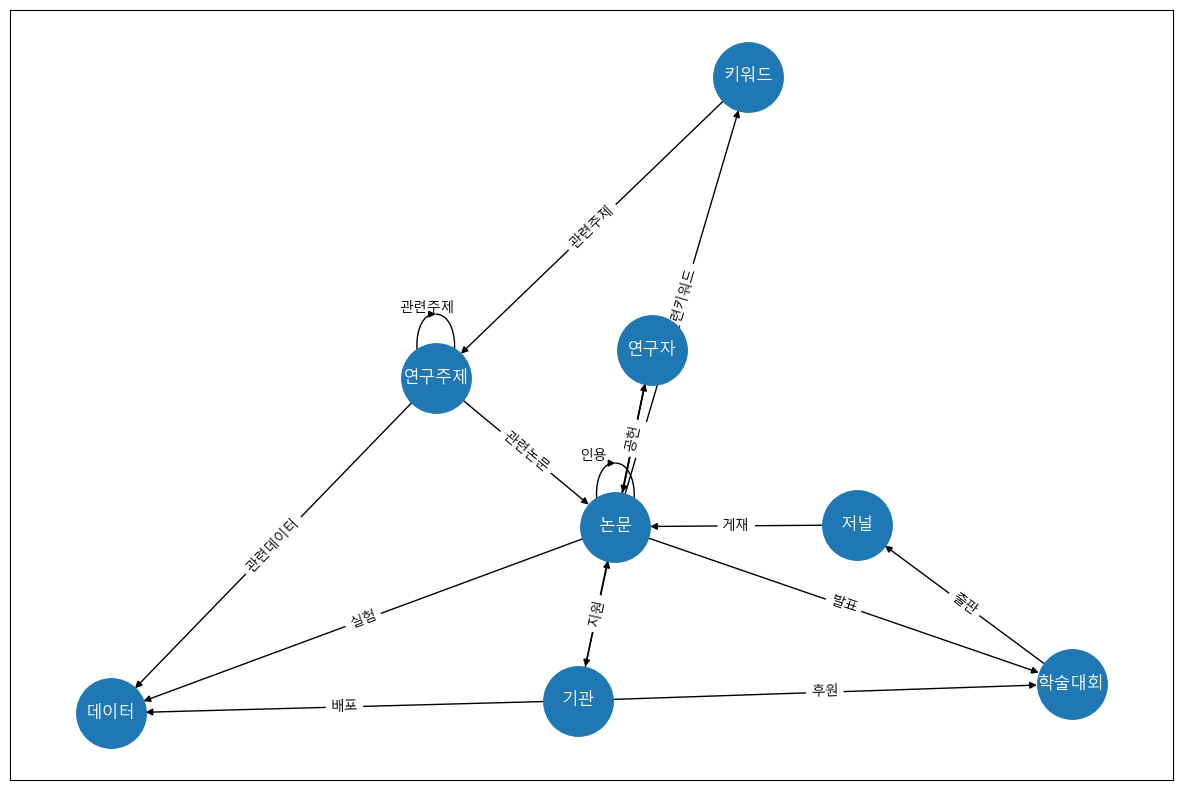

In [18]:
plt.rc('font', family='Malgun Gothic')

options = {
    "node_size": 2500,
    "font_size": 12,
    "font_family": "Malgun Gothic",
    "font_color": "white",
    "arrows": True,
    "arrowsize": 10,
    "width": 1.0
}


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
pos = nx.spring_layout(G)  # 그래프 레이아웃 설정
nx.draw_networkx(G, pos, **options)
# nx.draw_networkx_nodes(G, pos, node_size=2500)  # 노드 시각화
# nx.draw_networkx_labels(G, pos, font_family="Malgun Gothic", font_color="white")  # 노드 라벨 시각화
# nx.draw_networkx_edges(G, pos, width=1.0, arrows=True, arrowstyle="-|>", arrowsize=10)  # 엣지 시각화
# edge_labels = nx.get_edge_attributes(G, 'Relation')  # 엣지 속성값 가져오기
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_family="Malgun Gothic", font_color="black")  # 엣지 라벨 시각화
for u, v, d in G.edges(data=True):
    if u == v:  # if self loop
        plt.text(pos[u][0]-0.07, pos[u][1]+0.1, str(d['Relation']), fontsize=10)
    else:
        nx.draw_networkx_edge_labels(G, pos, {(u, v): str(d['Relation'])}, font_family="Malgun Gothic")

plt.show()